In [1]:
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tcn import TCN

In [2]:
#############################    DAX     ######################################################################
import datetime
import tscv
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB,ComplementNB
%matplotlib inline
import yfinance as yf 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from catboost import CatBoostClassifier,CatBoostRegressor
from xgboost import XGBClassifier
df = pd.read_csv((r"C:\Users\39333\Desktop\ANACONDA\EU_D1_Date.csv"),index_col=['Date'],parse_dates=['Date'])
#df=df.drop(columns=['Time','Vol','OI'],axis=1)
df
df['Close_log']=(df.Close.apply(np.log).diff(1).fillna(0))
#df,X,Y

#df['shift_log']=df['Close_log'].shift(0)
#df['shift_log_cat']=np.where(df.shift_log >0,1,0)
#df=df.dropna()
#df
#X=df[['Open','High','Low','Close']]#.shift(1).fillna(method='bfill')
#Y=df['shift_log']
#X,Y
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50,shuffle=False)
#df,X_test.shape,X,Y[:len(X)]

Date
2012-06-01    0.005484
2012-06-04    0.005335
2012-06-05   -0.003815
2012-06-06    0.010339
2012-06-07   -0.001686
                ...   
2021-09-03    0.000244
2021-09-06   -0.000758
2021-09-07   -0.002396
2021-09-08   -0.002190
2021-09-09    0.000812
Name: Close_log, Length: 2429, dtype: float64

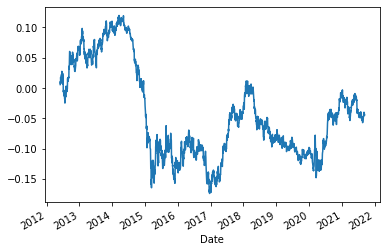

In [4]:
df1=df['Close_log'].dropna()
df1[-2429:].cumsum().plot()
df1[-2429:]

In [5]:
lookback_window = 3
df1 = df1.values
x, y = [], []
for i in range(lookback_window, len(df1)):
    x.append(df1[i - lookback_window:i])
    y.append(df1[i])
x = np.array(x)
y = np.array(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50,shuffle=False)
print(x_test.shape)
print(y_test.shape)

(2428, 3)
(2428,)


In [6]:
%matplotlib
model = Sequential([
    TCN(input_shape=(lookback_window, 1),
        kernel_size=3,
        nb_filters = 64,
        activation='relu',
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False,
        kernel_initializer ='he_normal' 
        ),
    Dense(1, activation='linear')
])

model.summary()
model.compile('adam', 'mae')

print('Train...')
model.fit(x_train, y_train, epochs=15, verbose=2)

p = model.predict(x_test)

plt.plot(p)
plt.plot(y_test)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()


Using matplotlib backend: Qt5Agg
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 64)                136256    
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/15
76/76 - 2s - loss: 0.0074
Epoch 2/15
76/76 - 1s - loss: 0.0053
Epoch 3/15
76/76 - 1s - loss: 0.0051
Epoch 4/15
76/76 - 1s - loss: 0.0052
Epoch 5/15
76/76 - 1s - loss: 0.0052
Epoch 6/15
76/76 - 1s - loss: 0.0050
Epoch 7/15
76/76 - 1s - loss: 0.0050
Epoch 8/15
76/76 - 1s - loss: 0.0050
Epoch 9/15
76/76 - 1s - loss: 0.0050
Epoch 10/15
76/76 - 1s - loss: 0.0050
Epoch 11/15
76/76 - 1s - loss: 0.0049
Epoch 12/15
76/76 - 1s - loss: 0.0051
Epoch 13/15
76/76 - 1s 

In [187]:
p.shape,x_test

((2428, 1),
 array([[-1.09139517e-02, -8.89582584e-05,  5.48441546e-03],
        [-8.89582584e-05,  5.48441546e-03,  5.33450112e-03],
        [ 5.48441546e-03,  5.33450112e-03, -3.81548297e-03],
        ...,
        [ 3.07012606e-03,  2.44193048e-04, -7.58035209e-04],
        [ 2.44193048e-04, -7.58035209e-04, -2.39579669e-03],
        [-7.58035209e-04, -2.39579669e-03, -2.18991459e-03]]))

In [150]:
plt.plot(y_test.reshape(-1,1)-p)


In [72]:
from collections import Counter
pos.value_counts()

 1    2416
-1      13
dtype: int64

In [200]:
yhat=p
w1 = pd.DataFrame(yhat,columns=['previsto'],index=(df.Close_log[-2428:].index))
w2 = df.Close_log[-2428:]
#ma_x=np.where(w1['previsto']>0,1,-1)########  prima opzione
ma_x=(w1['previsto']-df['Close_log'][-2428:])########  seconda opzione 

#ma_x =pd.DataFrame(yhat,columns=['previsto'])
ma_x=pd.DataFrame(ma_x,index=(df.Close_log[-2428:].index))
pos = ma_x.apply(np.sign)

In [201]:
w1,w2,ma_x,pos

(            previsto
 Date                
 2012-06-04  0.000530
 2012-06-05  0.000561
 2012-06-06  0.000948
 2012-06-07 -0.000456
 2012-06-08  0.000934
 ...              ...
 2021-09-03  0.000712
 2021-09-06  0.000897
 2021-09-07  0.000948
 2021-09-08  0.000947
 2021-09-09  0.000947
 
 [2428 rows x 1 columns],
 Date
 2012-06-04    0.005335
 2012-06-05   -0.003815
 2012-06-06    0.010339
 2012-06-07   -0.001686
 2012-06-08   -0.003509
                 ...   
 2021-09-03    0.000244
 2021-09-06   -0.000758
 2021-09-07   -0.002396
 2021-09-08   -0.002190
 2021-09-09    0.000812
 Name: Close_log, Length: 2428, dtype: float64,
                    0
 Date                
 2012-06-04 -0.004805
 2012-06-05  0.004377
 2012-06-06 -0.009391
 2012-06-07  0.001231
 2012-06-08  0.004444
 ...              ...
 2021-09-03  0.000468
 2021-09-06  0.001655
 2021-09-07  0.003344
 2021-09-08  0.003137
 2021-09-09  0.000135
 
 [2428 rows x 1 columns],
               0
 Date           
 2012-06-04 -1.0
 20

In [204]:
import matplotlib.pyplot as plt
rs=np.array(df1[-2428:])#.diff(1)
rs=rs.reshape(-1,1)
#rs=df.Close_log[-2429:]
#my_rs = pos*rs
#my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
#rs=rs.reshape(-1,1)#[len(x_test)]#[-257:]
rs.shape,pos.shape
my_rs=pos.shift(1)*rs
plt.plot(my_rs.cumsum())
df['Close_log'][-2428:].cumsum().plot(color='red')

<AxesSubplot:xlabel='Date'>

In [203]:
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')

<AxesSubplot:title={'center':'Strategy Performance'}, xlabel='Date'>